# Generate Gaussian Distributions

## Univariate Gaussian Distribution with Box Muller
The cumulative distribution function (cdf), given any probability distribution, is a real-valued
random variable whose range lies in 0 and 1. Usually, in order to get a specific probability distribution, we can invert its distribution function from an uniform distribution. 

As to generating a gaussian distribution, Box Muller Transformation is a great trick to generate two standard independent gaussian distribution with two independent uniforms.

The probability density function of a standard normal:
$$
f(x) = \frac{1}{\sqrt{2\pi}} \exp(-\frac{x^2}{2})
$$
If (X, Y) is a pair of independent standard normals, the joint probability density function is a product:
$$
f(x,y) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} \cdot \frac{1}{\sqrt{2\pi}} e^{-\frac{y^2}{2}}
$$

With the polar coordinate transformation from (X, Y) to (R, \\( \theta \\) ), where $0 \le \theta \le 2\pi$, $X = R \cos(\theta)$ and $r\,dr\,d\theta$ as the area element, we have the $R$ distribution function:
$$
P(R \le r') = \int \limits_{0}^{2\pi}  \int \limits_{0}^{r'} \frac{1}{2\pi} e^{-\frac{r^2}{2}} r \,dr \,d \theta.
$$

Let $U_1$ and $U_2$ be two independent random variables which are uniform distributed in [0, 1], then:
$$Z_0 = R\cos(\theta) = \sqrt{-2 \ln U_1} \cos(2\pi U_2)$$
and 
$$Z_1 = R\sin(\theta) = \sqrt{-2 \ln U_1} \sin(2\pi U_2)$$
Note that $Z_0$ and $Z_1$ are superisingly independent.

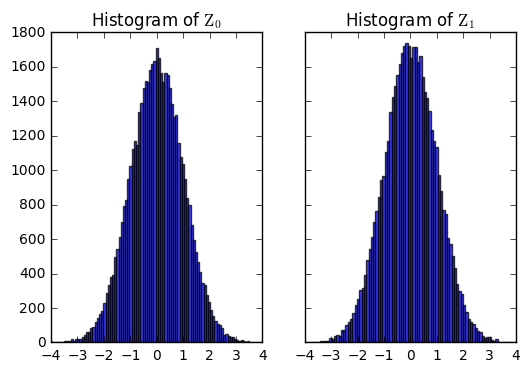

In [33]:
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt


uni_samples_1 = uniform(low=0.0, high=1.0, size=50000)
uni_samples_2 = uniform(low=0.0, high=1.0, size=50000)

gaussian_samples_1 = np.sqrt(-2* np.log(uni_samples_1))* np.cos(2 * np.pi * uni_samples_2) 
gaussian_samples_2 = np.sqrt(-2* np.log(uni_samples_1))* np.sin(2 * np.pi * uni_samples_2)
              
f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
# arguments: (samples, number of columns)
ax1.hist(gaussian_samples_1, 100, alpha=0.75)
ax1.axis([-4, 4, 0, 1800])
ax1.set_title(r'Histogram of $\mathrm{Z}_{0}$')

ax2.hist(gaussian_samples_2, 100, alpha=0.75)
ax2.axis([-4, 4, 0, 1800])
ax2.set_title(r'Histogram of $\mathrm{Z}_{1}$')

plt.show()